# COGS 108 - Final Project 

# Overview

In this project, I am analyzing the difference between the scores and violations given to businesses that own more than one restaurant and single restaurants in North Carolina. In order to analyze the significance of the statistics I create, I used a permutation test and p-value to decide whether the findings were significant or possibly due to random chance. 
<br>
This could help improve the restaurant health inspection process as we evaluate the score tendencies of larger vs smaller restaurants. It may provide insight on either potential bias in evaluating the two types of restaurants.
<br>
I found that smaller restaurants have a tendency to receive lower scores in comparison to bigger chains. 

# Name & PID

- Name: Madeline Tjoa
- PID: A15394053

# Research Question

Is there a relationship between the health scores given to restaurants in North Carolina and whether this restaurant owns multiple locations?
<br><br>
In order to measure this, I will be defining a small-family own restaurant to be a restaurant who has 5 or less restaurants in north carolina, and any restaurant bigger than this would be considered a chain restaurant who owns multiple locations. I will assess the average score given to smaller restaurants compared to bigger restaurants, and evaluating the difference between the two averages in order to assess the differences. 

## Background and Prior Work

<b>Research Question Details:</b> <br>
I am curious to analyze whether restaurants who are owned by a bigger business (compared to a mom/pop restaurant) might have different ratings on average. A "chain" refers to how large the restaurant is. For example McDonalds is a food chain which consists of thousands of restaurants worldwide. 
<br>
<b>Food Inspection process:</b><br>
Food inspectors come around 1-3 times a year, usually randomly or if there are customer complaints that are filed to the health and inspections website(4). The food inspection happens randomly, and then the inspector will mark down everytime they see a violation. If the violation is small, the restaurant can fix it on the spot or within a given timeframe. (You can also be penalized) If the violation is serious, the restaurant may be required to close their venue until it is fixed. Additionally, before a restaurant opens, they must pass evaluations and gain approval to reopen. <br>
<b>Problem: </b><br>
Based on Reddit threads, we can see there is a large variability between the punishments given to restaurants during health inspections. One health inspector shares a moment when he found a restaurant with raw food laying a broken fridge overnight, who continued to serve the meat. He ordered the meat to be thrown out but also witnessed employees taking the meat out of the garbage for reuse. He ordered for the meat to be drowned in bleach so it wouldn't be served, and the restaurant was not closed down. (2) However in another case, an aspiring restaurant owner looking to open his restaurant had clean kitchen, but was having trouble passing the health inspection to be approved to open his business.(3) I would like to find out whether there is a relation between restaurants who are not closed down and how big the business is. 
<br>
<b>Prior work: </b><br>
Regarding the grades of restaurants, it is noted in a report about LA County's food inspection that "Grades below a C usually require an immediate closure of the restaurant. Restaurants with a score below C are also required to post their numeric score in the window" (9) Which means that some restaurants may still operate with a Health Score of C, while the San Bernardino County Closures link (8) shows that most of the closed restaurants that year had a grade of B or ungraded, so there is a wide variability between whether a restaurant will be closed. <br>
Additionally, since some health inspections may only occur from customer complaints, restaurants with less traffic may be subject to more lenient grading. The city of Boston has partnered with Yelp and Harvard to develop a method that allows them to perform more inspections in places based on complaints on yelp. (7) The issue with this method is that restaurants that may not be around the hotspot, in less popular areas may in effect be less regulated. In that case, they may be less likely to be closed over the restaurants subject to more frequent health inspections. <br>

References (include links):
- 1) https://www.sandiegocounty.gov/content/sdc/deh/fhd/ffis/intro.html.html Health inspection proccess for San Diego
- 2) https://www.reddit.com/r/AskReddit/comments/598qrb/health_inspectors_of_reddit_whats_the_worst/ Reddit Health inspectors sharing their horror stories
- 3) https://www.reddit.com/r/KitchenConfidential/comments/2fennc/most_evil_health_inspector_tricks_youve/ Shows the variety of health inspections and situations
- 4) https://blog.typsy.com/how-do-health-inspections-work How Health inspections work
- 5) https://www.sandiegocounty.gov/content/dam/sdc/deh/fhd/food/pdf/publications_foodselfinspection.pdf Self Inspection checklist for San Diego
- 6) https://www.washingtonpost.com/news/voraciously/wp/2018/07/24/yelp-adds-health-inspection-scores-for-restaurants-and-restaurateurs-are-not-happy/ Yelp has health inspection scores for restaurants
- 7) https://www.drivendata.co/case-studies/using-yelp-reviews-to-flag-restaurant-health-risks/ The city of Boston used yelp reviews to flag restaurant health risks.
- 8) https://www.sbsun.com/2020/01/10/rodents-no-hot-water-defying-closure-restaurant-closures-inspections-in-san-bernardino-county-jan-3-9/ closers in san bernardino county and their reasons. 
- 9) http://www.ocgrandjury.org/pdfs/restaurant-inspections/restaurant.pdf Report regarding LA County Health Inspections

# Hypothesis


I think that there is going to be a trend of lower scores based on whether the restaurant has a food chain or not. I believe that restaurants that are part of a chain might have a larger budget to hire people in charge of making sure that violations are fixed, which may lead to their scores being higher compared to smaller restaurants who do not have the budget to do this. 

# Dataset

- Dataset Name: inspectionsdf
- Link to the dataset: inspections.csv
- Number of observations: (18466 rows, 37 columns)

This dataset includes information about each inspection that occured in certain cities in North Carolina. 

# Setup

In [692]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import shapely.geometry as shp
import sklearn.neighbors as skn
import sklearn.metrics as skm
import sklearn
import random as rd
import datetime
import matplotlib.patches as mpatches

#import dataframes
inspectionsdf = pd.read_csv("inspections.csv")
restaurantsdf = pd.read_csv("restaurants.csv") # not useful
violationsdf = pd.read_csv("violations.csv")
yelpdf = pd.read_csv("yelp.csv")
zipcodesdf = pd.read_csv("zipcodes.csv")

# Data Cleaning

I start first by cleaning the datasets, I am not yet filling any null values as I am unsure whether they will be useful for me in the future.
<br>
a lot of my columns have null values, and most of them are not missing at random, for exacmple the descriptions or whether the restaurant has been evaluated before. Overall I cannot just delete all of the columns since they are <b>Not missing at random</b> thus I have left them as is, but in some of my dataframes I replaced the null values with 0 or empty strings. 

<h3>Cleaning</h3>

<h4>Removing Uneccessary Columns / Columns that may violate ethics and privacy</h4>
I will first start by taking out columns which will not be useful for my analysis, such as phone number.<br>

In [693]:
# drop irrelevant columns
newinspectionsdf = inspectionsdf.drop(["address1","address2", "phonenumber", "state", 
                                       'geocodestatus', 'inspectedby', 'postalcode', 'type'], axis = 1)
newinspectionsdf[newinspectionsdf.columns[10:20]].head()

,description,inspection_num,inspector_id,previous_inspection_date,days_since_previous_inspection,previous_inspection_by_same_inspector,score,num_critical,num_non_critical,num_critical_previous
0,This facility cooks eggs to order in Grill sta...,1,27.0,NaN,NaN,NaN,96.0,9,7,NaN
1,NaN,1,7.0,NaN,NaN,NaN,98.0,0,11,NaN
2,NaN,1,3.0,NaN,NaN,NaN,97.0,4,8,NaN
3,NaN,1,24.0,NaN,NaN,NaN,99.0,2,3,NaN
4,"New rules, www.wakegov.com/food",1,7.0,NaN,NaN,NaN,97.0,2,4,NaN


<h4>Correcting My column dtypes</h4>
I notice that restaurantopendate and date is saved as a string, so i convet it from a string to a datetime object

In [694]:
newinspectionsdf['restaurantopendate'] = pd.to_datetime(newinspectionsdf['restaurantopendate'])
newinspectionsdf['date'] = pd.to_datetime(newinspectionsdf['date'])

<h4>Unifying my String values (aka making everything caps, etc)</h4>
name is inconsistent and since I am interested in finding restaurant food chains, I need to take out all the # which differentiate each restaurant part of the food chain. For example *panera bread* identifies their different restuarnts using numbers (as can be seen in the dataframe above) so I use regex to unify the names

In [695]:
newinspectionsdf['name'] = (newinspectionsdf['name']
         .str.replace(r'[(#)-][^a-zA-Z]*', '')
         .str.replace(r' ', '')
         .str.replace(r'[^a-zA-Z]*', '')
         .str.upper());
restaurantsdf['name'] = (restaurantsdf['name']
         .str.replace(r'[(#)-][^a-zA-Z]*', '')
         .str.replace(r' ', '')
         .str.replace(r'[^a-zA-Z]*', '')
         .str.upper());
restaurantsdf.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRINGCAFE,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINACLASSICHOTDOGSWCID,309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,TACOBELL,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THEREMEDYDINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULONHOUSEKITCHEN,551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


<h4>Creating a new dataframe based on inspectors for future analysis</h4>
Additionally, I am interested in analyzing the inspectors so I am going to make a new dataframe in which I count the amount of inspections that each inspector has done and how many inspections they have scored <= 89 in. From merging these two values, I get NaN values, which I know are <b>not missing at random</b> and I know that these values indicate that the inspector had never scored a restaurant lower than 89, so I fill these NaN values with the value 0. 

In [696]:
less_89 = pd.DataFrame(newinspectionsdf[newinspectionsdf['score'] <= 89].
                       groupby("inspector_id")['inspector_id'].count()).rename(
    {'inspector_id': 'score<89'}, axis = 1)
inspectdf = pd.DataFrame(inspectionsdf['inspector_id'].value_counts()
                           ).rename({'inspector_id': 'total_inspections'}, axis = 1)
inspectorsdf = pd.concat([inspectdf, less_89], axis = 1, sort = False).fillna(0)
inspectorsdf.head()

,total_inspections,score<89
1.0,1369,34.0
2.0,1072,53.0
3.0,957,0.0
4.0,139,2.0
5.0,904,4.0


<h4>Standardize my counts to percentages</h4>
I am going to add another column, in which we evaluate the percent of inspections that the inspector gave low ratings. This is to create a uniform measurement because just evaluating the counts is not a good way to compare all the inspectors since they all have evaluated a different amount of restaurants. 

In [697]:
inspectorsdf['percent<89'] = (inspectorsdf['score<89']/inspectorsdf['total_inspections'])*100
inspectorsdf.sort_values('percent<89', ascending= False).head()

,total_inspections,score<89,percent<89
31.0,270,28.0,10.370370
2.0,1072,53.0,4.944030
27.0,332,15.0,4.518072
25.0,1267,44.0,3.472770
1.0,1369,34.0,2.483565


<h4>Create a Column to Classify the restaurants into chain vs not chain</h4>
I am adding a column which will specify whether the restaurant is part of a chain or not so that I could analyze this further later. This will be useful for me to be able to compare the results of inspections for chain and not chain restaurants.
<br>
I will utilize <b>restaurantsdf</b> in order to evaluate whether the restaurant is a food chain, as using <b>inspectionsdf</b> would be incorrect since one restaurant may have multiple evaluations, so we cannot determine whether the restaurant is a food chain based on the amount of inspections the name has received. 

In [698]:
restaurant_count = pd.DataFrame(restaurantsdf['name'].value_counts()).rename({'name':'count'}, axis = 1)
restaurant_count['chain_type'] = restaurant_count['count'].apply(lambda x: "chain" if x > 1 else "not chain")
restaurant_count = restaurant_count.reset_index().rename({'index':'name'}, axis = 1)
restaurant_count = restaurant_count[restaurant_count["chain_type"] == "chain"]
# restaurantsdf

In [699]:
def ischain(row):
    if row in np.array(restaurant_count["name"]):
        return "chain"
    return "not chain"
newinspectionsdf['chain'] = newinspectionsdf['name'].apply(ischain)

Now let's quickly review the cleaned inspectionssdf

In [700]:
newinspectionsdf.head()

,hsisid,date,name,city,restaurantopendate,days_from_open_date,facilitytype,x,y,zip,...,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical,chain
0,4092013748,2012-09-21 00:00:00+00:00,CAFEATWAKEMED,raleigh,2002-12-21 00:00:00+00:00,3562,Restaurant,-78.587963,35.783914,27610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,not chain
1,4092014046,2012-09-21 00:00:00+00:00,OVERTIMESPORTSPUB,raleigh,2004-05-04 00:00:00+00:00,3062,Restaurant,-78.549673,35.791986,27610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,not chain
2,4092015191,2012-09-21 00:00:00+00:00,TASTEOFCHINA,raleigh,2008-08-04 00:00:00+00:00,1509,Restaurant,-78.547960,35.723125,27610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,chain
3,4092016122,2012-09-21 00:00:00+00:00,PANERABREAD,cary,2012-03-28 00:00:00+00:00,177,Restaurant,-78.815727,35.799249,27513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,chain
4,4092021513,2012-09-21 00:00:00+00:00,WALMARTSUPERCENTERDELIBAKERY,zebulon,2008-02-25 00:00:00+00:00,1670,Food Stand,-78.296347,35.831285,27597,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,not chain


# Data Analysis & Results

I am going to analyze the scores given to restaurants, mainly focusing on the difference in scores for non chain and chain restaurants. In order to evaluate the significance of my findings, I will be using a permutation test. 

<h3><b>Assumptions:</b></h3>
Before proceeding to the Analysis, there are some assumptions that are being made based on the dataset for certain columns. 

<br>
- I am assuming that restaurants of the same name are part of the same company, for example all of the McDonalds are part of the same company. Therefore any restaurant who is the only one of its kind in North Carolina will be considered <i>not</i> part of a food chain. 
<br>

<h3>Exploratory Data Analysis</h3>

<h4>Let's look at statistics of inspectionsdf</h4>
From this table, we can see that restaurants on average are scoring very high, with an average of 96. we can also see the total average critical and non-critical violations a restaurant will have. 

In [701]:
inspectionsdf[["days_from_open_date", "score", "num_critical", "num_non_critical"]].describe()

,days_from_open_date,score,num_critical,num_non_critical
count,18466.000000,18466.000000,18466.000000,18466.000000
mean,3262.693274,96.235324,2.844308,5.161432
std,2569.271482,2.654203,2.809652,3.679451
min,-160.000000,72.500000,0.000000,0.000000
25%,1069.000000,95.000000,1.000000,3.000000
50%,2733.000000,97.000000,2.000000,4.000000
75%,4884.750000,98.000000,4.000000,7.000000
max,10947.000000,100.000000,23.000000,33.000000


<h4>Let's look at the Distributions of the violations</h4>
From this plot, we can see that most of the number of <b>not critical</b> values is right skewed and most restuarants will have between 2-5 violations in their visits.

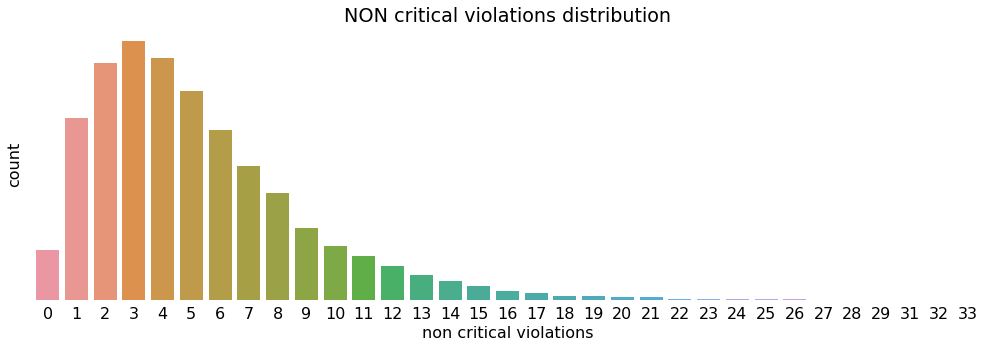

In [702]:
#prettify the plot
sns.set_style({"xtick.bottom": False,
               "xtick.top": False,
               "ytick.left":False, 
               'axes.edgecolor': 'white', 'text.color': 'black'})
ax = sns.countplot(x = 'num_non_critical', data = newinspectionsdf)
ax.set(xlabel = 'critical violations', ylabel = '', yticklabels = [])
ax.set_xlabel(xlabel = "non critical violations", color = 'black')
ax.set_ylabel(ylabel = "count", color = 'black')
plt.title("NON critical violations distribution")
plt.show()

Lets compare this to the number of <b>critical</b> violations marked in restaurants. We can see there tends to be less critical violations compared to not critical, and there tends to be 0 or 2 critical violations in a visit. 

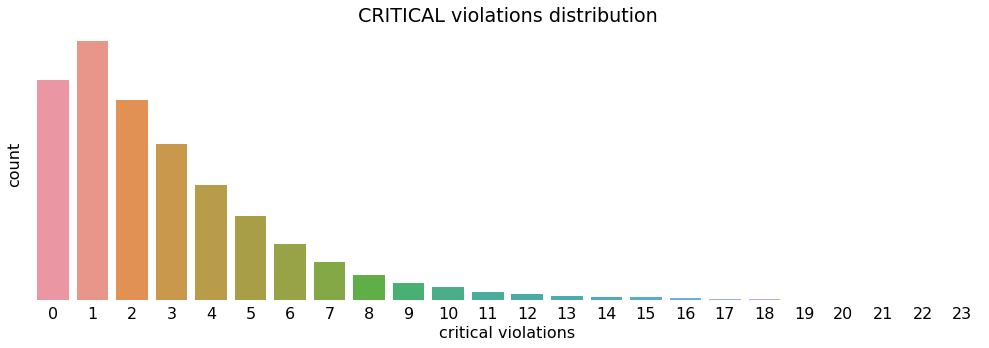

In [703]:
#prettify the plot
sns.set_style({"xtick.bottom": False,
               "xtick.top": False,
               "ytick.left":False, 
               'axes.edgecolor': 'white', 'text.color': 'black', 'palette' : 'deep'})
ax = sns.countplot(x = 'num_critical', data = newinspectionsdf)
ax.set(xlabel = 'critical violations', ylabel = 'count', yticklabels = [])
ax.set_xlabel(xlabel = "critical violations", color = 'black')
ax.set_ylabel(ylabel = "count", color = 'black')
plt.title("CRITICAL violations distribution")
plt.show()

<h4>Now that we've seen the general distribution for overral inspections, will it differ if we were to analyze the number of violations based on chains vs non chains?</h4>

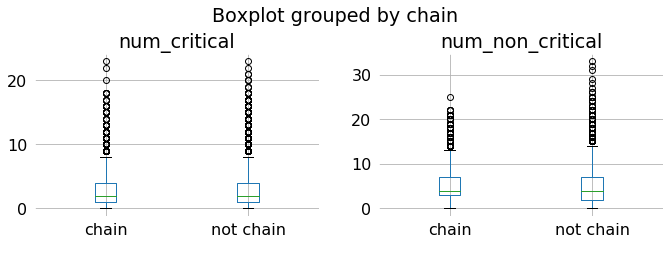

In [704]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
# axes.set(xlabel = 'critical violations', ylabel = '', yticklabels = [])
newinspectionsdf.boxplot(column = 'num_critical', by = 'chain', ax = axes[0])
newinspectionsdf.boxplot(column = 'num_non_critical', by = 'chain', ax = axes[1])
fig.tight_layout(pad = 2)

From a glance, it appears that in terms of critical violations, chain and non chain restaurants are pretty even, although chain restaurants have bigger outliers. This could be due to a high amount of chain restaurants than non chain restaurants. Meanwhile, when evaluating the number of non critical violations, the non critical evaluations for non chain restaurants has a higher average, despite the number of outliers that can be found in chain restaurants. This suggests that smaller restaurants tend to receive more non-critical violations compared to larger restaurants on average. 

<h4>Analyzing the amount of times the restaurant chains have been evaluated. </h4>
We can see that subway has more food evaluations than most restaurants. Possible reasons include there may be a lot of subways in orth carolina, subway may have been in north carolina for a while, or a mixture of both. 

In [705]:
newinspectionsdf['name'].value_counts()

SUBWAY                    401
FOODLIONMEATMARKET        332
FOODLIONDELI              279
HARRISTEETERDELI          215
MCDONALDS                 210
                         ... 
EDWARDSMILLBARANDGRILL      1
BOGEYSBISTRO                1
CAFETIRAMISU                1
TROPHYBREWING               1
PERUANOWCID                 1
Name: name, Length: 2051, dtype: int64

<h4>Compare the average score between restaurant chains and not restaurant chains</h4>
It appears that chain has a slightly higher average score than not chain, but we would need to perform a permutation test to see if there is an actual significance in this. 

In [706]:
original_statistics = newinspectionsdf.groupby('chain')['score'].mean()
real_difference = original_statistics[0] - original_statistics[1]
original_statistics

chain
chain        96.397589
not chain    96.127256
Name: score, dtype: float64

<h4>Perform a permutation test to see if the differences between chain and not chain is significant</h4>
It appears that chain has a slightly higher average score than not chain, but we would need to perform a permutation test to see if there is an actual significance in this. 
<br>
We will perform this permutation test with: <br>
<b>null hypothesis: </b> There is no significant difference between the difference we see between chain and not chain, and it is due to random chance 
<br>
<b>alternative hypothesis: </b> There is some sort of significant difference between the chain and not chain difference
<br>
We are going to perform this test, and assume that a p value of 0.05 or less is of significance. 

0.0

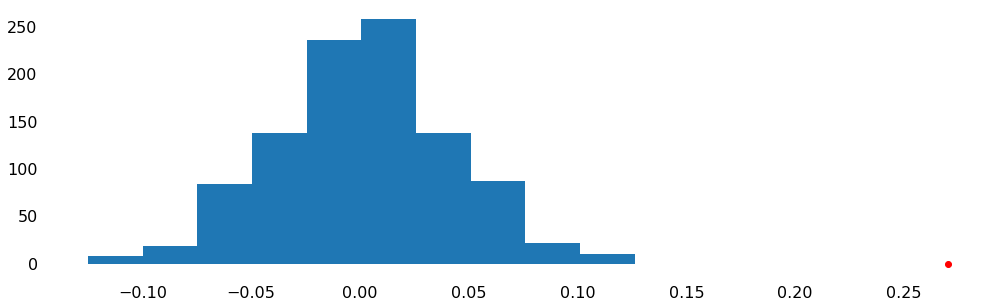

In [707]:
victim = newinspectionsdf[['score', 'chain']].copy(deep = True)
results = []
for i in range(1000):
    victim['shuffled'] = np.random.permutation(newinspectionsdf['chain'].copy(deep = True).values)
    group_victim = victim.groupby("shuffled")['score'].mean()
    difference = group_victim[0] - group_victim[1]
    results.append(difference)
plt.hist(results)
plt.scatter(real_difference, y = 0, color = 'red')
np.sum(results >= real_difference)/1000

We see with the p value of nearly 0 there is some significant difference between the ratings given to chain restaurants and non-chain restaurants, therefore we reject our null hypothesis that there is no difference in the average score given. Therefore we can see that although at first glance the difference in scores does not appear to be significant based on a fast glance, the scores do not come from the same distribution. 

/Users/madeline/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/madeline/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


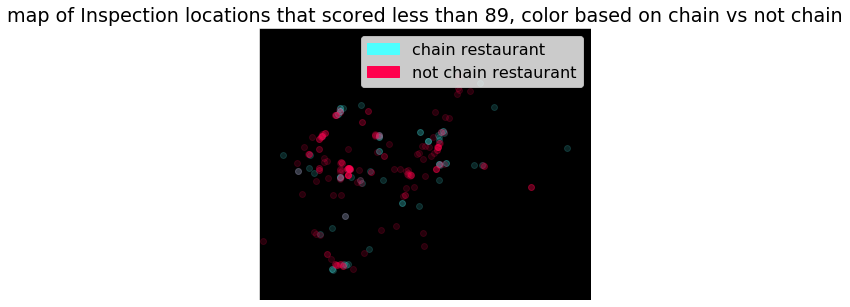

In [708]:
# get all the ids of the inspectors
inspector_ids = ["chain", "not chain"]
# create a color list so there is different colors to represent each inspector
color_list = [(.3,1,1),(1,0,.3)]
# using the north carolina map (although it wasn't very useful in creating my visualization)
ax = world[world.STATE_ABBR == 'NC'].plot(
        color='black', edgecolor='black')
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(-78.95, -78.267)
ax.set_ylim(35.52, 36.08)
ax.set_xlabel("")
ax.set_ylabel("")
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())
chain = []
for i in range(len(inspector_ids)):
    shrunkdf = newinspectionsdf[newinspectionsdf["chain"] == inspector_ids[i]][newinspectionsdf["score"] < 89]
    gdf = gpd.GeoDataFrame(
    shrunkdf, geometry=gpd.points_from_xy(shrunkdf.x, shrunkdf.y))
    ref = gdf.plot(ax=ax, color = color_list[i], alpha = 0.15)
    chain.append(ref)
plt.title('map of Inspection locations that scored less than 89, color based on chain vs not chain', color = 'black')
red_patch = mpatches.Patch(color=(.3,1,1), label='chain restaurant')
blue_patch = mpatches.Patch(color=(1,0,.3), label='not chain restaurant')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

We inspect the location of all of the restaurants to see if there is some sort of divide between chain restaurants and non chain restaurants on the map. There appears to be no apparent difference in their placement across the map. <br>
However, notice that there are more prominently red areas which indicate multiple non-chain restaurants that received lower ratings. It is unclear what the reason for these areas receiving lower ratings is.

# Ethics & Privacy

<b>Permission to use this data / use it for this purpose:<br></b>
Since most of the inspections are public information, I would have permission to use the datasets. I also assume since I was given this by COGS 108, it was not illegally downloaded and should be from some sort of public data.<br>

<b>Privacy concerns regarding your datasets that you need to deal with, and/or terms of use that I need to comply with:</b>
<br>
I would assume that all of the phone numbers, and names should be taken out before starting to analyze my datatset. I made careful to only use the ids that were given to me, and refered to all of the inspectors by their id's. Additionally it is important for me to make sure that I keep an open mind not to assume some sort of bias between certain restaurants or inspectors based on any factors. <br>

<b>Potential biases in my dataset, in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis:</b><br> Restaurants in different areas will be graded by different inspectors, so there can be a bias between the grades that were received. However, it would be difficult to be able to account for the bias between inspectors to protect their privacies and locations. 

<b>
<br>Other issues related to the topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact: </b>
<br>
Depending on the results that are drawn from the data, restaurants that are still open who's issues parrallel to closed restaurants may receive bad PR, which can lead to less business.
<br>

<b>How will I handle these above issues:</b><br>
For the first issue regarding privacy, I have dealt with that in my data cleaning process in which I referred to the Data Ethics and Privacy steps in order to take out important information that may identify the inspectors or businesses such as their names and phone numbers. This is important so that none of the restauratns can be impacted negatively based on the results of the data and to protect their privacy. In terms of bias in my result based on the locations of restaurants, My dataset is currently consisted of North Carolina restuarants, and I most likely use random samples to sample across the whole dataset, and perform permutation tests to make sure my values are actually significant. It would be difficult to tell whether any bias in the data is due to inspectors or locations.

# Conclusion & Discussion

At first glance, the average scores between chain and non-chain restaurants seem very similar. However, it appears that the scores that restaurant chains receive do differ between chains and non chains. The cause for this difference is unclear. 
<br> Potential reasons for this difference may be based on factors such as the difference in numbers of independent vs chain restaurants. Additional factors which may have effected my results is my way of defining whether a restaurant is part of a chain or not. <br>
<b>Limitations: </b> For my analysis, I split the restaurants based on two categories, however perhaps there is a different conclusion that might be drawn if I created more bins such as individual restaurants, medium sized restaurants, and large restaurants. Additionally, it would definitely have been more interesting if I could evaluate whether the restaurant would get closed down when getting a violation lower than 85, and compare the results between large restaurants and smaller ones since I think that larger restaurants may be closed down less often when compared to smaller restaurants based on the results I see from my analysis. 